In [1]:

# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Читаем данные
df = pd.read_csv('wine.csv')

In [3]:
# 1. Разведочный анализ данных (EDA)
print("Общая информация о датасете:")
print(df.info())
print("\nОписание числовых признаков:")
print(df.describe())

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

Описание числовых признаков:

In [4]:
# Проверка на пропуски
print("\nПропущенные значения:")
print(df.isnull().sum())


Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [5]:
# Корреляционный анализ
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

ValueError: could not convert string to float: 'red'

<Figure size 1200x800 with 0 Axes>

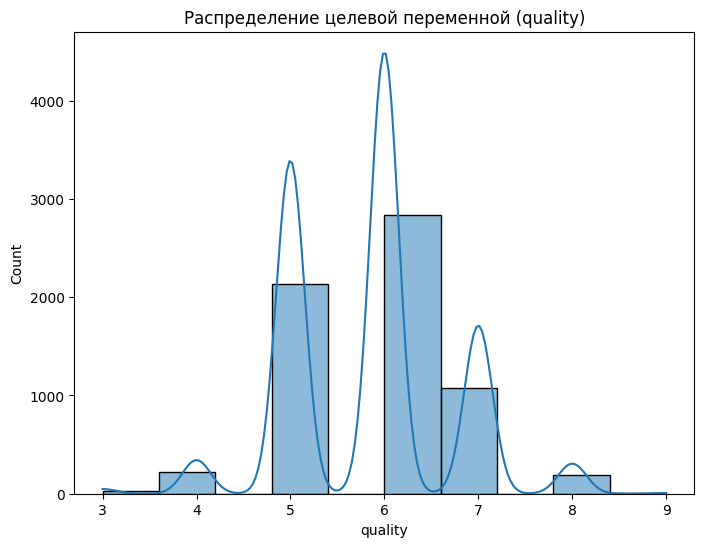

In [6]:
# Анализ целевой переменной
plt.figure(figsize=(8, 6))
sns.histplot(df['quality'], bins=10, kde=True)
plt.title('Распределение целевой переменной (quality)')
plt.show()

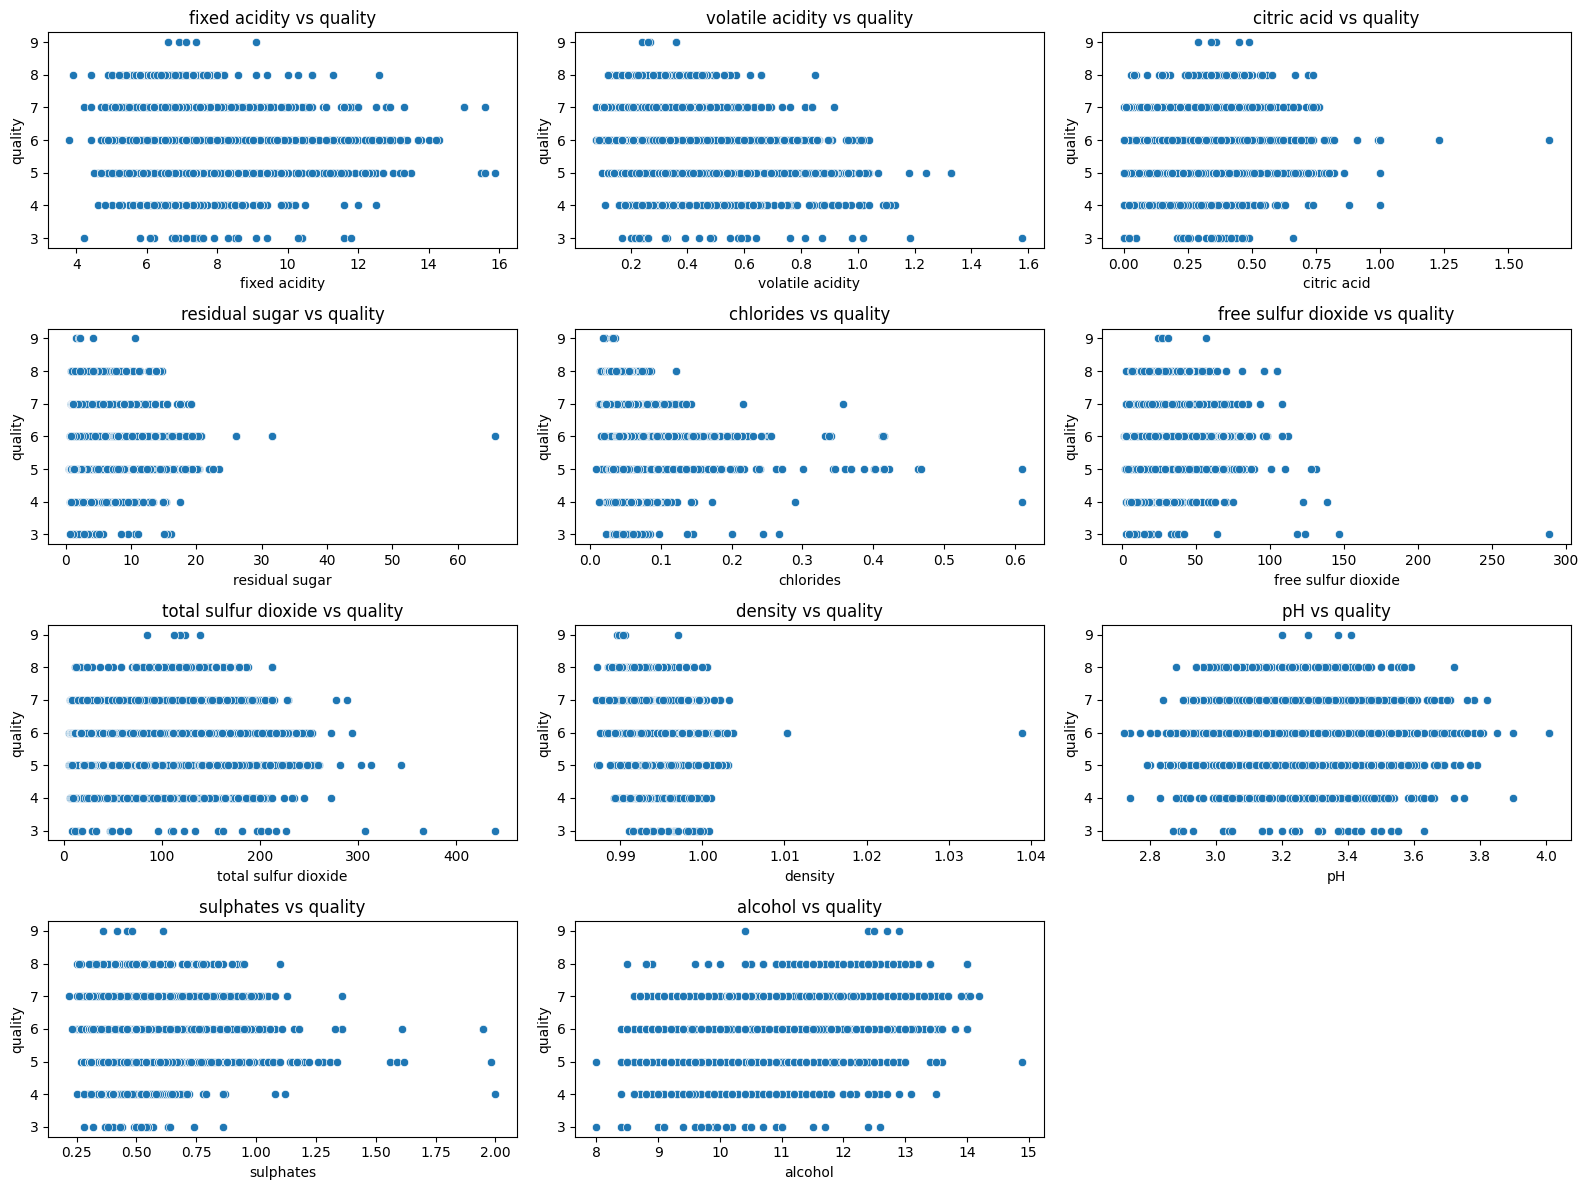

In [7]:
# 2. Анализ влияния признаков на целевую переменную
plt.figure(figsize=(16, 12))
for i, column in enumerate(df.columns[:-2], 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[column], y=df['quality'])
    plt.title(f'{column} vs quality')
plt.tight_layout()
plt.show()

In [8]:
# 3. Обработка пропусков
# В нашем датасете пропусков нет, но если бы они были, можно было бы использовать:
# df.fillna(df.mean(), inplace=True)  # замена на среднее
# df.fillna(method='ffill', inplace=True)  # заполнение вперед

In [9]:
# 4. Подготовка данных для модели
X = df.drop(['quality', 'type'], axis=1)
y = df['quality']

In [10]:
# 5. Обучение модели на всей выборке
model_full = LinearRegression()
model_full.fit(X, y)

# Предсказания и метрики
y_pred_full = model_full.predict(X)
print("\nМетрики на полной выборке:")
print(f"MSE: {mean_squared_error(y, y_pred_full)}")
print(f"R2: {r2_score(y, y_pred_full)}")



Метрики на полной выборке:
MSE: 0.5397154672776703
R2: 0.29213688504107915



Метрики на обучающей выборке:
Train MSE: 0.5384290416826734
Train R2: 0.2992523560502254

Метрики на тестовой выборке:
Test MSE: 0.5466964419594437
Test R2: 0.25976731297714073


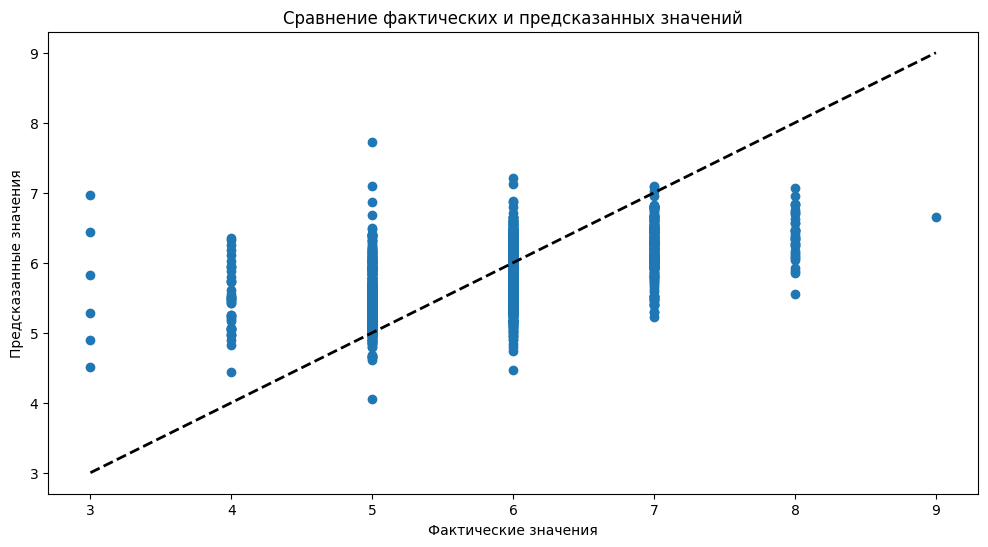

In [11]:
# 6. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Метрики
print("\nМетрики на обучающей выборке:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Train R2: {r2_score(y_train, y_train_pred)}")

print("\nМетрики на тестовой выборке:")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Test R2: {r2_score(y_test, y_test_pred)}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()